# Presentation du cas

# Import librairies

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tqdm as tqdm
import glob
import string
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import warnings
import pickle
warnings.filterwarnings('ignore')

# Telechargements donnees

In [50]:
with open("cleaned_data.pkl","rb") as f:
    data=pickle.load(f)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 83 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   code                                            9937 non-null   int64  
 1   product_name                                    9915 non-null   object 
 2   generic_name                                    5612 non-null   object 
 3   pnns_groups_1                                   9397 non-null   object 
 4   pnns_groups_2                                   9937 non-null   object 
 5   additives_n                                     9937 non-null   float64
 6   packaging_tags                                  9818 non-null   object 
 7   brands_tags                                     9885 non-null   object 
 8   categories_tags                                 9887 non-null   object 
 9   origins_tags                             

# Data exploration

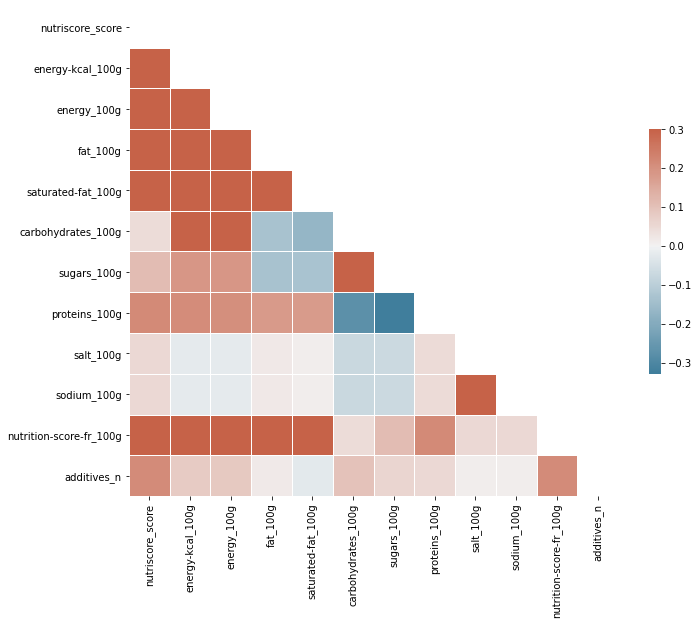

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def quant_data_exploration(data,columns,mode="box"):
    nrows=len(data.columns)%4
    quant_data=data[columns]
    counter=0
    if mode is "pair":
        sns.pairplot(data[columns])
    elif mode is "cor":
        corr = data[columns].corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(11, 9))
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    elif mode is "cluster":
        corrmat = data[columns].corr(method='spearman')
        cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
    else:
        fig, ax = plt.subplots(4, nrows,figsize=(20,20))
        fig.suptitle('Quantitative variable univariate analysis')
        for r in range(nrows):
            for c in range(4):
                if mode is "box":
                    ax[c,r].boxplot(quant_data[columns[counter]])
                    ax[c,r].set_title(columns[counter])
                elif mode is "histo":
                    ax[c,r].hist(quant_data[columns[counter]])
                    ax[c,r].set_title(columns[counter])

                counter+=1
                if counter==11:
                    break
        
    return quant_data
            
quant_columns=list(data[data.columns[15:26]].columns) + ["additives_n"]
quant_data=quant_data_exploration(data,quant_columns,mode="cor")

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='[pnns_groups_1]'>

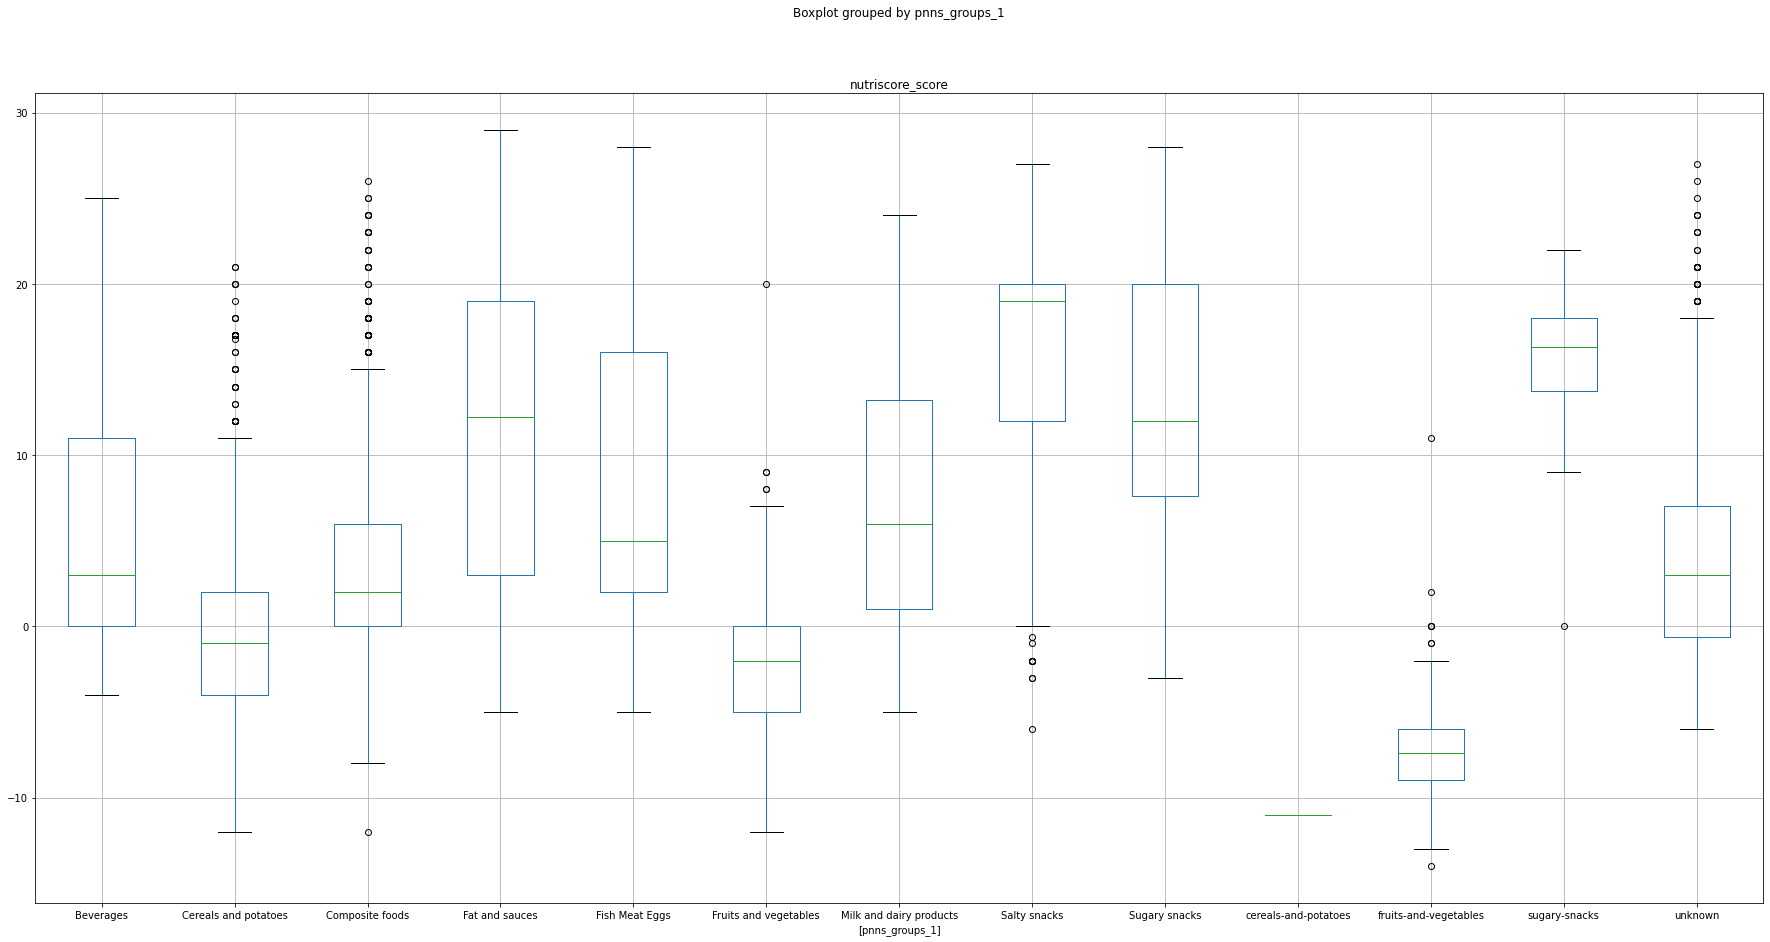

In [29]:
data.boxplot("nutriscore_score",by=["pnns_groups_1"],figsize=(30,15))

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='[pnns_groups_2]'>

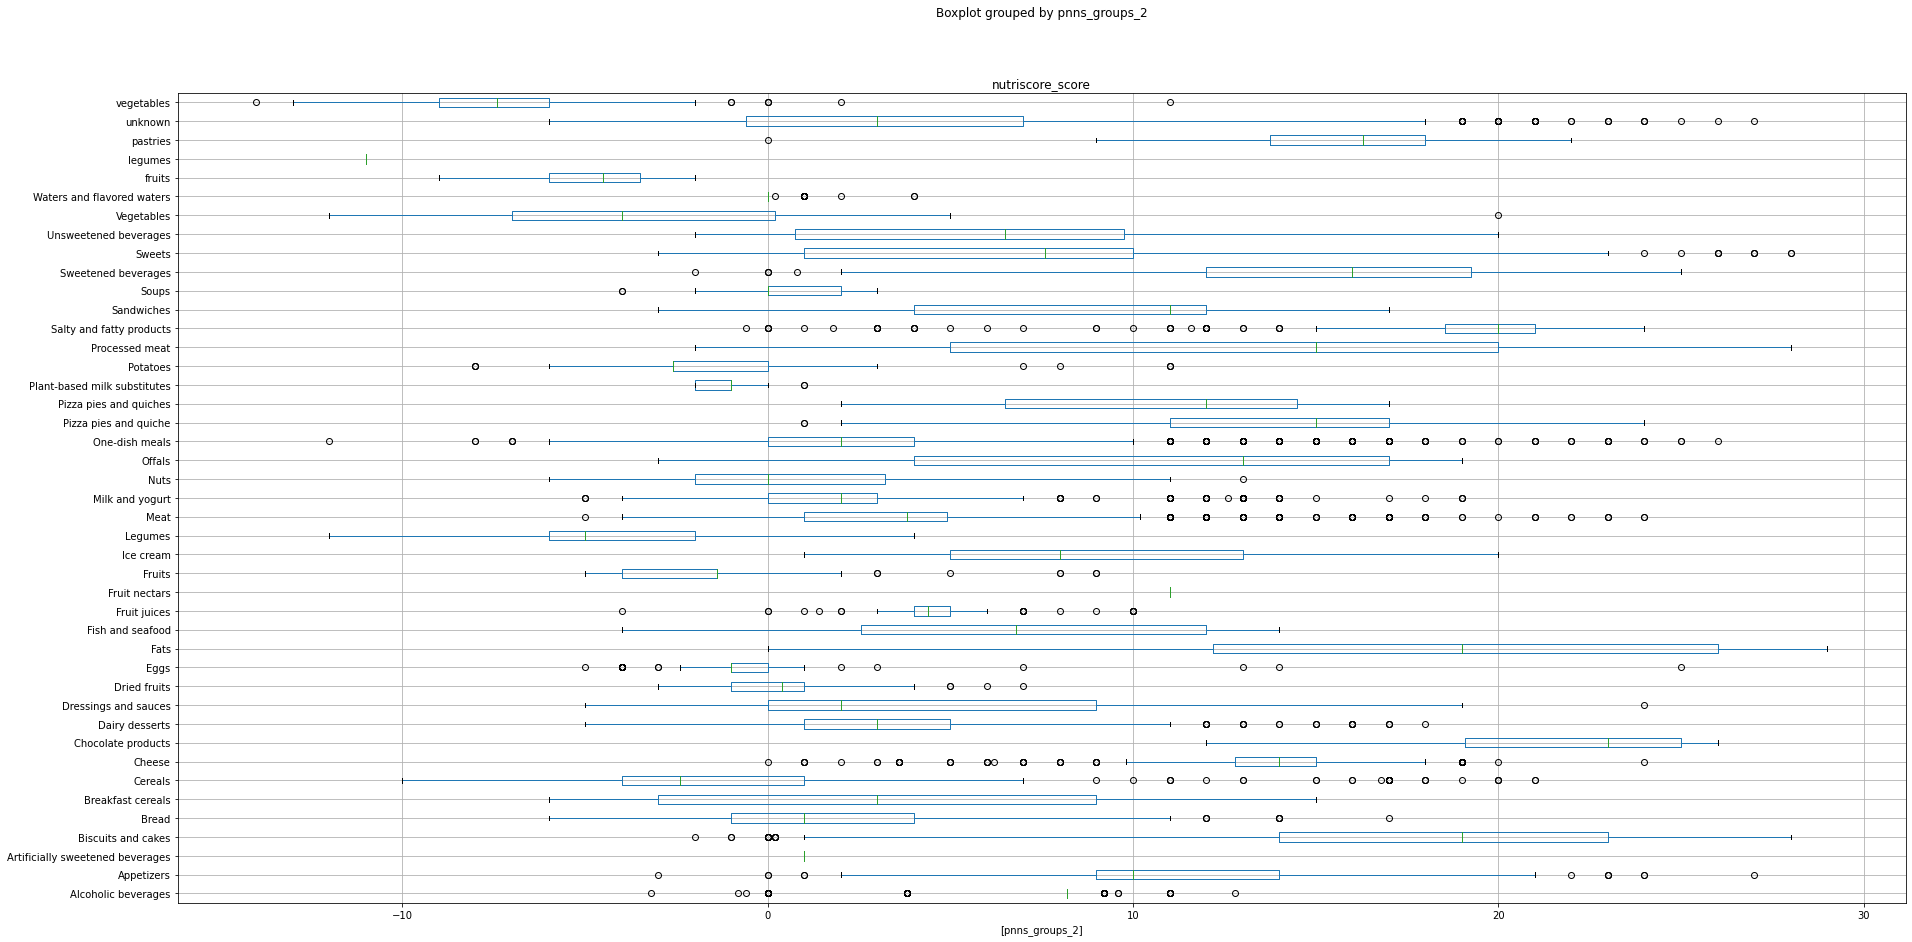

In [31]:
data.boxplot("nutriscore_score",by=["pnns_groups_2"],figsize=(30,15),vert=False)

<AxesSubplot:title={'center':'provided_nutriscore'}, xlabel='[pnns_groups_1]'>

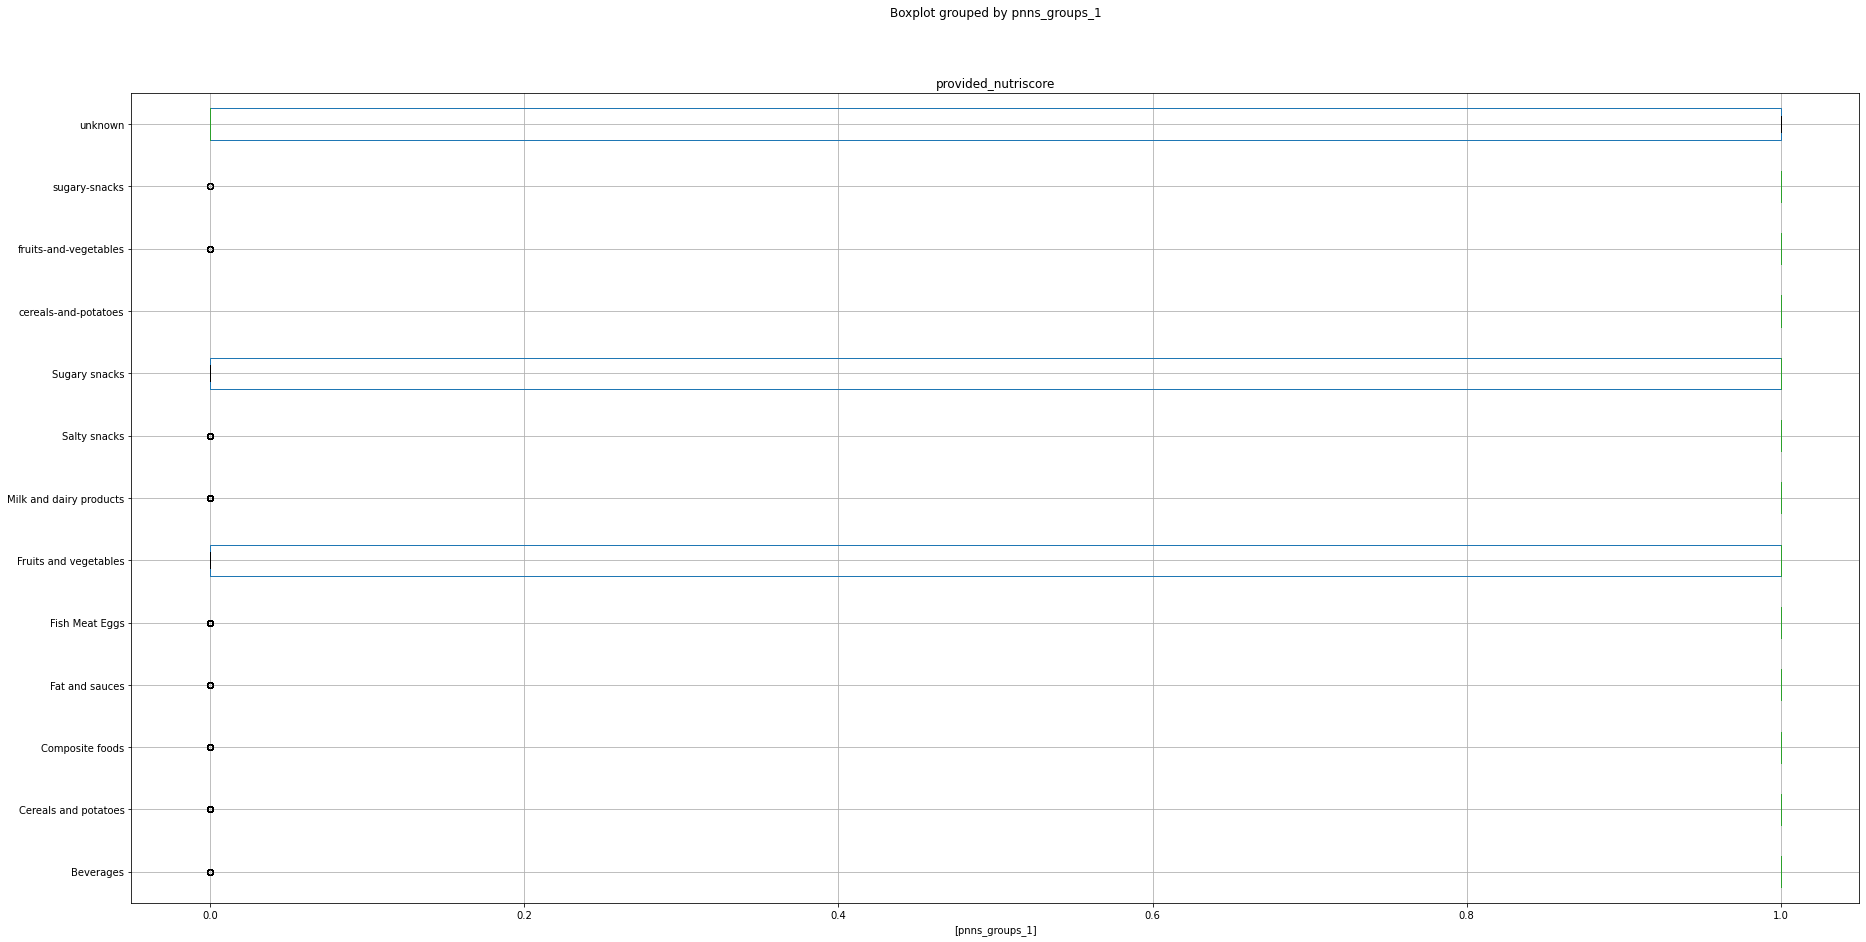

In [32]:
data.boxplot("provided_nutriscore",by=["pnns_groups_1"],figsize=(30,15),vert=False)

<AxesSubplot:title={'center':'provided_nutriscore'}, xlabel='[pnns_groups_2]'>

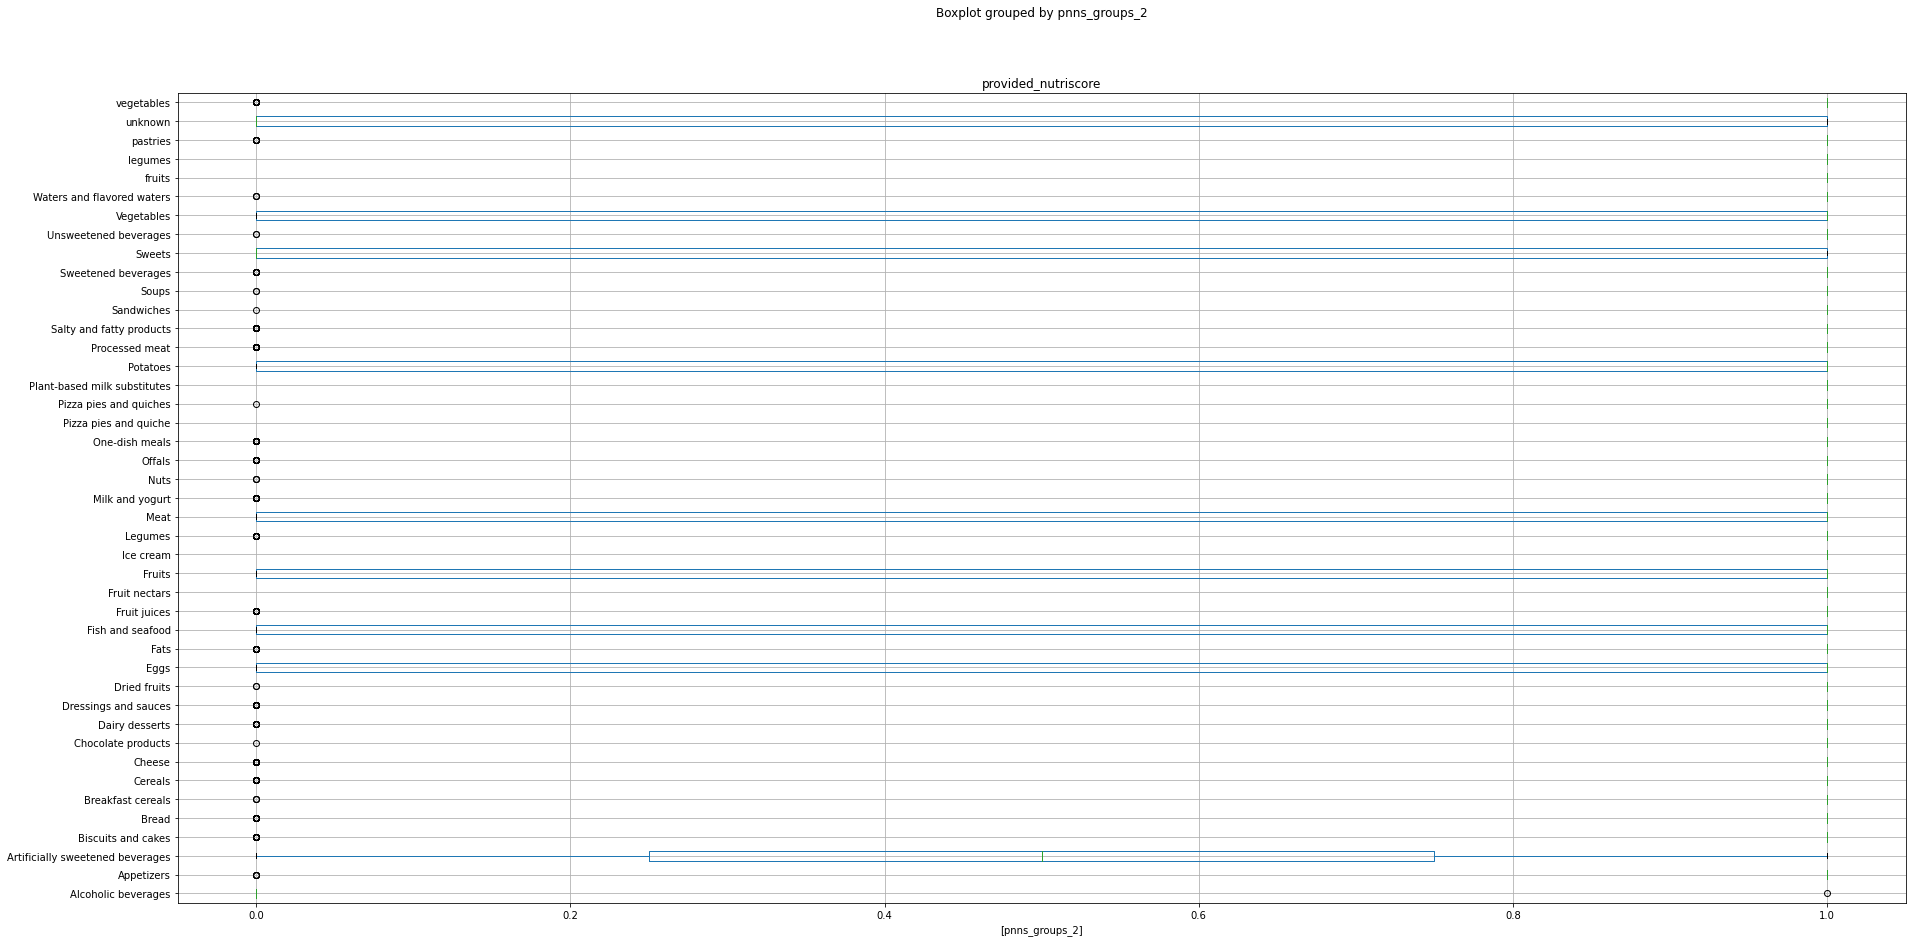

In [33]:
data.boxplot("provided_nutriscore",by=["pnns_groups_2"],figsize=(30,15),vert=False)

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='[additives_n]'>

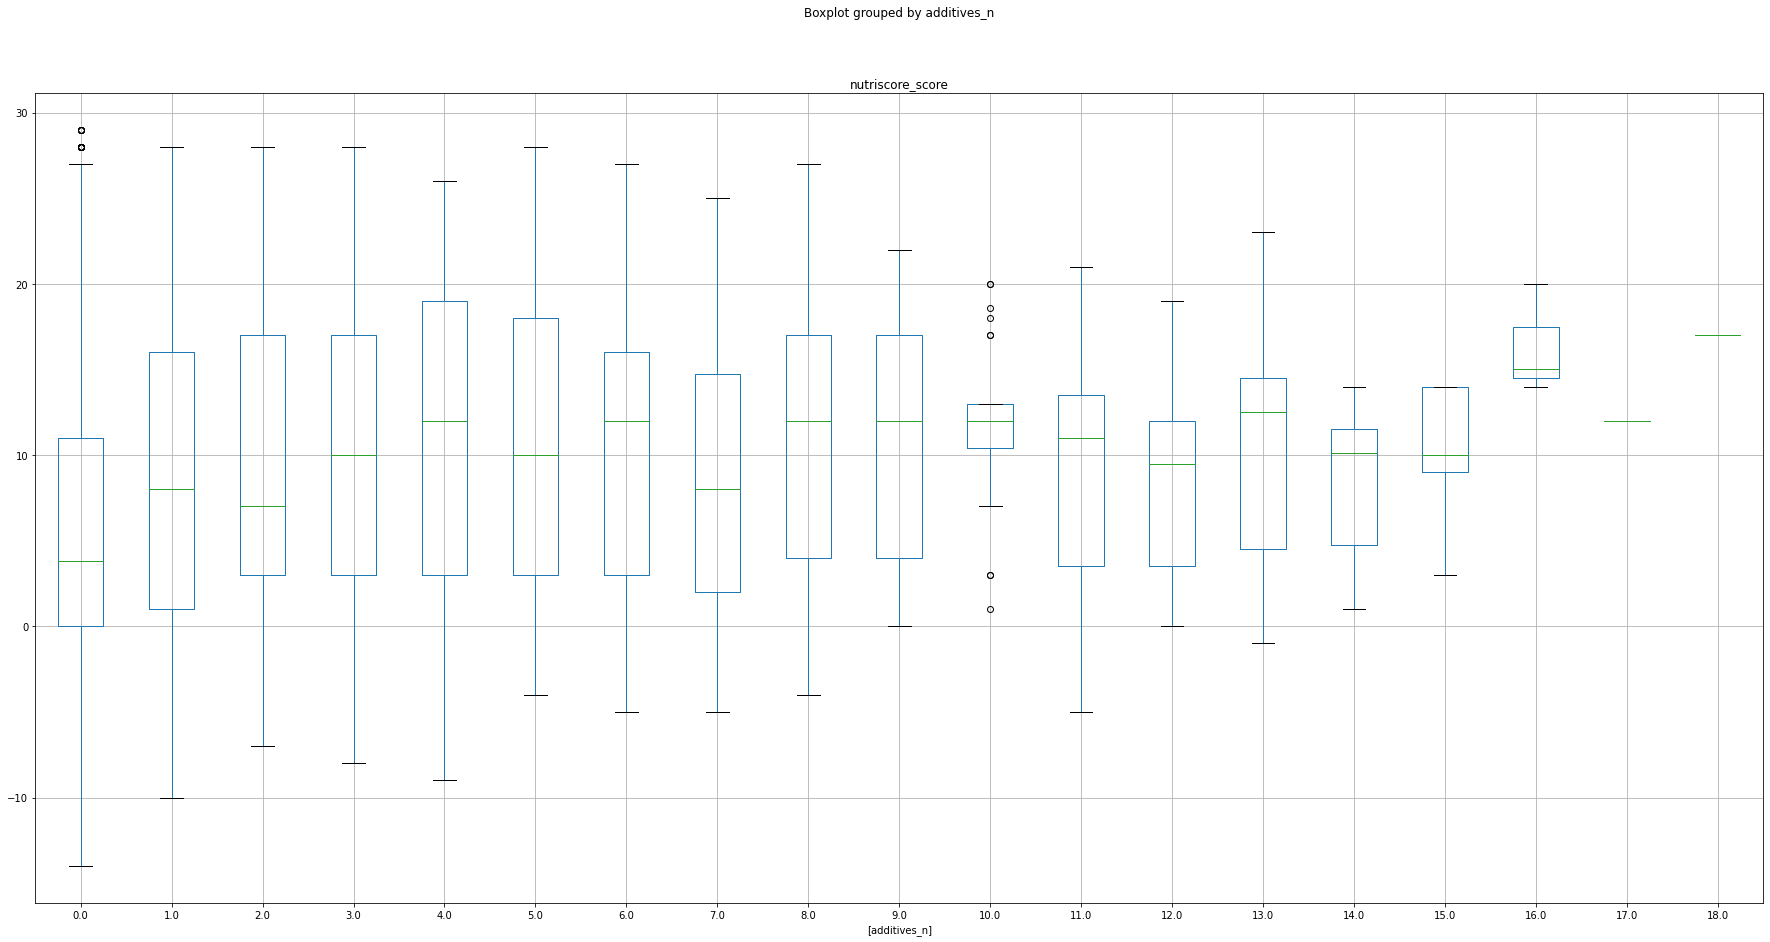

In [52]:
data.boxplot("nutriscore_score",by=["additives_n"],figsize=(30,15))